Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,
1.Sepal Length
2.Sepal Width
3.Petal Length
4.Petal Width
Using above 4 features you will clasify a flower in one of the three categories,
1.Setosa
2.Versicolour
3.Virginica

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
li = load_iris()

In [3]:
li.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
li.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
li.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
li.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [7]:
df = pd.DataFrame(li.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df.columns =li.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
x = li.data
y = li.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,random_state =2)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression(random_state=0)
model.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [14]:
Y_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1])

In [15]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1])

In [16]:
model.score(X_test,Y_test)

0.9736842105263158

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_predict)
cm

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

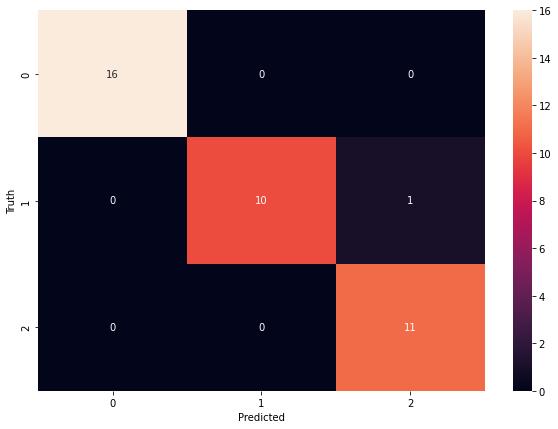

In [18]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_predict))

0.9736842105263158
